A regressão logística deve ser usada em problemas de classificação **binários**, ou seja, problemas para os quais os dados devam ser classificados entre dois grupos distintos e mutuamente excludentes, como:
- O cliente comprou ou não um certo produto?
- Uma transaçã com cartão de crédito é legítima ou se trata de uma fraude?
- Uma mensagem de email é ou não spam?
- O paciente está com diabetes?

Ela funciona de modo semelhante à Regressão Linear, porém, como se trata de um algoritmo de **classificação**, a variável dependente será **sempre** um **rótulo**, e não um **Valor**, como na RL. Esse rótulo (a classe que será atribuída à variável dependente) será **binário** - só poderá apresentar dois valores, ou 0 ou 1; ou verdadeiro ou falso; ou positivo ou negativo...



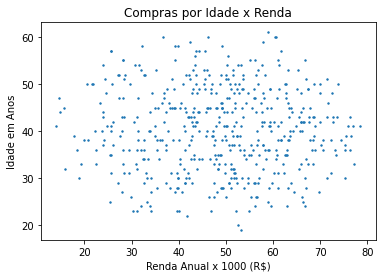

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

LINHAS = 0
COLUNAS = 1
dados = pd.read_csv('/kaggle/input/vendascsv/vendas.csv')
compradores = dados[dados['Comprou'] == 1]
compradores.drop(['Comprou'], axis = COLUNAS)
plt.title('Compras por Idade x Renda')
plt.xlabel('Renda Anual x 1000 (R$)')
plt.ylabel('Idade em Anos')
plt.scatter(compradores.Renda/1000, compradores.Idade, s = 2)
plt.show()

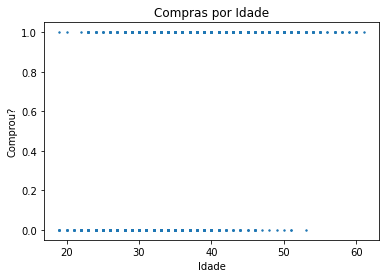

In [2]:
X = dados['Idade']
y = dados['Comprou']
plt.title('Compras por Idade')
plt.xlabel('Idade')
plt.ylabel('Comprou?')
plt.scatter(X, y, s = 2)
plt.show()

A idéia por trás da Regressão Logística é a de, em vez de modelar em qua lclasse acomodar cada elemento da amostra de dados, definir uma função que retorna a **probabilidade** de um dado elemento pertencer à classe 0 ou 1. Em seguida, defini-se um **ponto de corte** - uma probabilidade acima da qual a class do elemento será considerada 1, e, caso contrátrio, 0. Em geral o valor adotado na maioria das obras é 0.5, porém podemos ajustá-lo de acordo com as características do problema em estudo.


## Razão das chances
A razão das chances é a probabilidade faorável a um determinado evento, que pode ser expressa pela fórmula:

> p/(1-p)

sendo p a probabilidade do evento **positivo**. O **evento positivo** refere-se ao evento cuja probabilidade deseja-se estimar, como por exemplo, a chance de um paciente ter determinada característica genética.
Por exemplo, se p = 0.75 a razã odas chances é de 3 para 1, pois: 

> 0.75/1-0.75  == 0.75/0.25 = 3

oque significa que existe uma chance de 3 para 1 da função de probabilidade mapear essa característica para a classe 1.
A razão das chances sempre será um número no intervalo 0, +∞. Como esse intervalo é limitado à esquerda pelo 0 mas pode crescer até o infinito positivo, é comum definie uma função *logit* que consiste simplesmente do **logaritmo natual** (base e~2.71) das razões das chances, ou seja:

> logit(p) = ln p/(1-p)

Essa função recebe como parâmetro uma **probabilidade** p que está no intervalo [0:1], e mapeia para todos os valores reais, que podem se usados para expressar uma relação linear entre os valores das variáveis independentes e os logaritmos das probabilidades, estendendo assim os valores que ela pode retornar para )-∞ , +∞(. Por meio de algumas manipulações algébricas, a função pode ser reescrita para: 

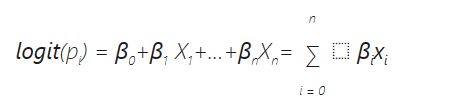

Onde:
- pi representa a probabilidade do evento
- X1...Xn são as variáveis **independentes** do modelo
- B0, B1...Bn são os coeficientes do modelo

Daí, p(y=15|x) é a **probabilidade condicional** de que uma amostra pertença À classe 15, dadas as caractetrísticas expressas por uma variável independente X.
Dizendo de outra forma, p(y=15|x) é a probabilidade de que a variável **dependente** y tenha o valor 15, dados os valores das variáveis **indepententes X**.

A função *logit* **mapeia probabilidades para valores reais**. Na maioria das vezes é desejável fazer o contrário, ou seja, **dado o valor de uma amostra**, busca-se obter a **probabilidade de que esse valor pertença a uma dada classe**. Para tal, utiliza-se a inversa da função logit(p).
A função inversa da logi é a **sigmoide**, cujo nome vem do formato do seu gráfico, semelhante a uma letra S.
A função logit mapeia uma probabilidade entre 0 e 1 em um espaço de números reais, enquanto que a função **sigmoide** mapeia valores reais em probabilidades no intervalo [0,1].

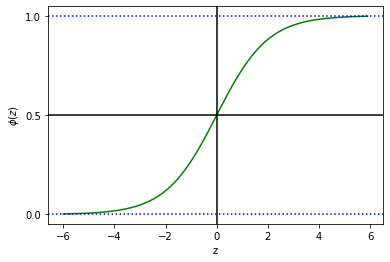

In [3]:
#Gráfico de função sigmoide
#Definindo os pontos
import numpy as np
def sigmoide(z):
    result = 1.0/(1.0 + np.exp(-z))
    return result
z = np.arange(-6, 6, 0.1)
fi_z = sigmoide(z)

#Plotando o gráfico
plt.plot(z, fi_z, color = 'g') #Desenha a curva sigmoide
plt.axvline(0.0, color = 'k') #Eixo vertical (Y)
plt.axhline(y = 0.5, color = 'k') #Eixo horizontal (X)
plt.axhline(y = 0.0, color = 'b', ls = 'dotted') #Linha x tracejada inferior
plt.axhline(y = 1.0, color = 'b', ls =  'dotted') #Linha x tracejada superior
plt.yticks([0.0, 0.5, 1.0]) #Marcadores no eixo Y
plt.xlabel('z') #Legenda do eixo das abscissas
#usando sintaxe do TeX para imprimir a letra grega Fi
plt.ylabel('$\phi (z)$')
plt.show()

Observando o gráfico, notamos que ele nunca ultrapassa os limites Y = 0 e Y = 1, oq ue atende as necessidades de uma função de probabilidade (dito de modo mais matemático, o **conjunto imagem** da função sigmoide são os números reais no intervalo [0,1]), o que resolve o problema da regressão.
Um ponto importante da sigmoide, é que a partir da função é possível determinar a probabilidade de um elemento pertencer a uma dada classe. O modelo de Regressão Logística considera que se a probabilidade for superio a um determinado limiar (assumido como 0.5 ou 50%), o elemento srá considerado como pertencente à classe 1; caso contrário, pertencente à classe 0.
___

# Implementando a Regressão Logística em Python

____
Estimando a probabilidade de uma pessoa possuir diabetes

In [4]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv',
                 names = ['#Gravidezes', 'Glicose', 'PD',
                          'DobraTriceps', 'Insulina', 'IMC',
                         'DiabetesPdFunction', 'Idade', 'Classe'])
df.head(10)

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPdFunction,Idade,Classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#verificando a existência de valores nulos
df.isnull().values.any()
#retorna False, ou seja, sem valores nulos no dataset

False

In [6]:
#setando o dataframe para mostrar todas as colunas
pd.set_option('display.max_columns', 10)

In [7]:
#Analisando por cima as estatísticas do dataset
df.describe()

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPdFunction,Idade,Classe
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#verificando os valores onde temos 0 como entrada
#(IMC, Insulina, pressão...) não podem ser zero
print('Estatísticas discritivas do dataset')
print('Contando os zeros na amostra')
print('*'*35)
print(f'Número de gravidezes: {(df["#Gravidezes"]==0).sum()} zeros')
print(f'Glicose: {(df["Glicose"]==0).sum()} zeros')
print(f'Pressão diastólica: {(df["PD"]==0).sum()} zeros')
print(f'Espessura da dobra do tríceps  {(df["DobraTriceps"]==0).sum()} zeros')
print(f'Insulina: {(df["Insulina"]==0).sum()} zeros')
print(f'IMC: {(df["IMC"]==0).sum()} zeros')
print(f'Idade: {(df["Idade"]==0).sum()} zeros')
print('*'*35)

Estatísticas discritivas do dataset
Contando os zeros na amostra
***********************************
Número de gravidezes: 111 zeros
Glicose: 5 zeros
Pressão diastólica: 35 zeros
Espessura da dobra do tríceps  227 zeros
Insulina: 374 zeros
IMC: 11 zeros
Idade: 0 zeros
***********************************


___
### Além da idade e gravidez, nenhum outro atributo pode ter valor igual a 0.
Tais valores podem ser preenchidos por meio de alguma análise (média, mediana, moda) ou excluídos do dataset a fim de não enviar dados espúrios ao algoritmo.
___

In [9]:
#fazer uma cópia do dataset for god sake
df_copy = df.copy()

#Qtd linhas pré exclusão
print(f'Quantidade de linhas antes da exclusão: {len(df_copy)}')

#Dropando linhas onde tem valor == 0
df_copy = df_copy.drop(df_copy[df_copy.Glicose == 0].index)
df_copy = df_copy.drop(df_copy[df_copy.PD == 0].index)
df_copy = df_copy.drop(df_copy[df_copy.DobraTriceps == 0].index)
df_copy = df_copy.drop(df_copy[df_copy.Insulina == 0].index)
df_copy = df_copy.drop(df_copy[df_copy.IMC == 0].index)

#Qtd linhas pós exclusão
print(f'Quantidade de linhas após exclusão: {len(df_copy)}')
#Qtd linhas excluídas
print(f'Quanidade de linhas excluídas: {len(df) - len(df_copy)}')


Quantidade de linhas antes da exclusão: 768
Quantidade de linhas após exclusão: 392
Quanidade de linhas excluídas: 376


In [10]:
#Contagem de quantas pessoas tem diabetes e quantas não tem
classe_0 = len(df_copy[df_copy.Classe == 0])
classe_1 = len(df_copy[df_copy.Classe == 1])
print(f'Pessoas que COM diabetes na nossa amostra: {classe_0} ou ({(classe_0 * 100 / (classe_0 + classe_1)):.2f}%)')
print(f'Pessoas que COM diabetes na nossa amostra: {classe_1} ou ({(classe_1 * 100 / (classe_0 + classe_1)):.2f}%)')

Pessoas que COM diabetes na nossa amostra: 262 ou (66.84%)
Pessoas que COM diabetes na nossa amostra: 130 ou (33.16%)


In [11]:
#exportando arquivo csv alterado
df_copy.to_csv('diatebes_processado.csv', header = False)

<AxesSubplot:xlabel='classe'>

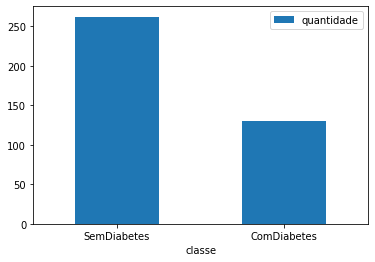

In [12]:
#plotando o gráfico para visualizar os dados de quem tem e não tem diabetes
df_diabetes = pd.read_csv('/kaggle/working/diatebes_processado.csv',
                          names = ['#Gravidezes', 'Glicose', 'PD',
                          'DobraTriceps', 'Insulina', 'IMC',
                         'DiabetesPdFunction', 'Idade', 'Classe'])

#Criando um dataframe especial somente com a Classe 0 ou 1
df_class = pd.DataFrame({
    'classe': ['SemDiabetes', 'ComDiabetes'],
    'quantidade': [len(df_diabetes[df_diabetes.Classe == 0]), len(df_diabetes[df_diabetes.Classe == 1])]
})
df_class.plot(kind='bar', x = 'classe', y = 'quantidade', rot=0)

___
### Gerando três gráficos diferentes para cada variável independente da nossa amostra
___

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

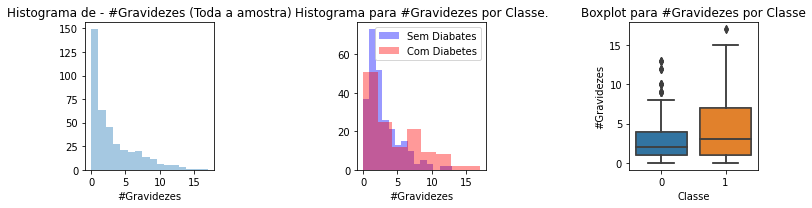

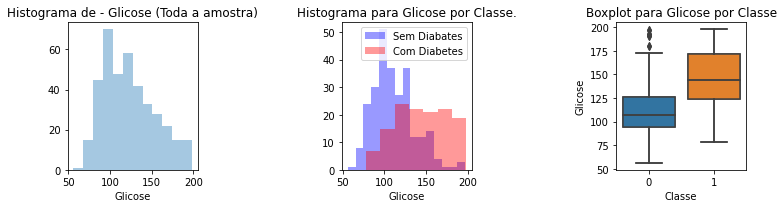

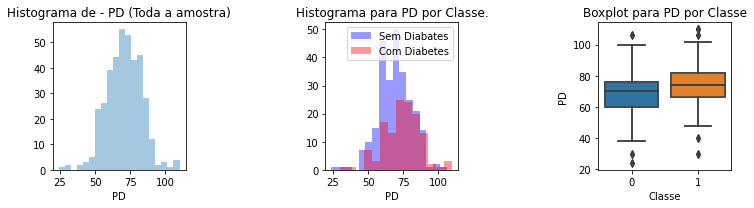

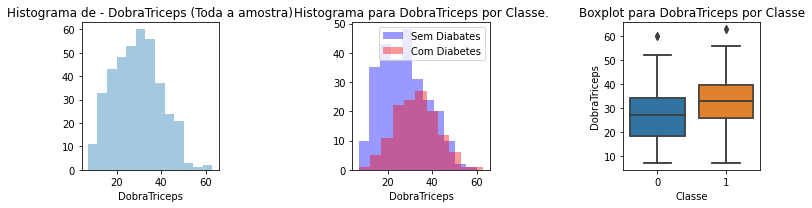

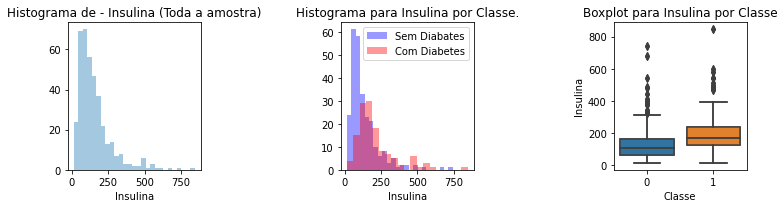

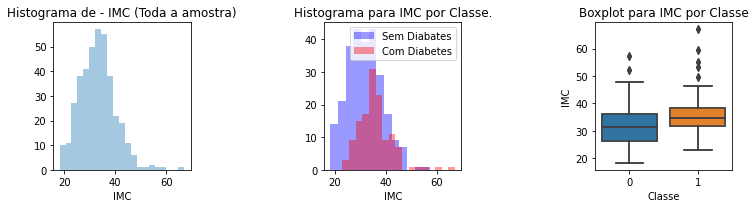

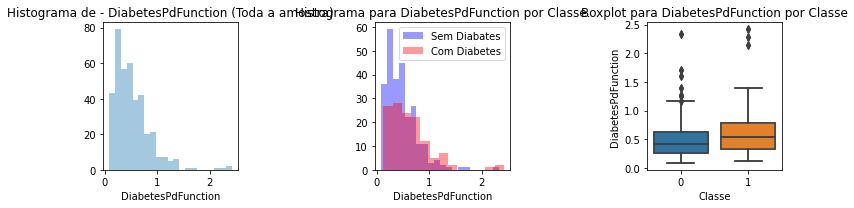

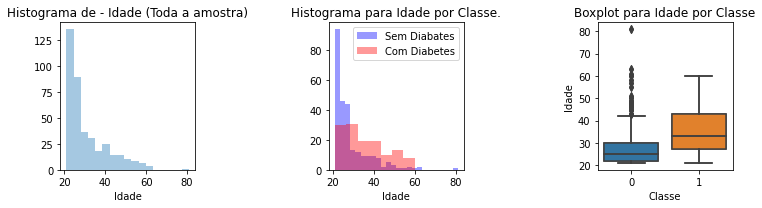

In [13]:
import seaborn as sns

com_diabetes = df_diabetes[df_diabetes.Classe == 1]
sem_diabetes = df_diabetes[df_diabetes.Classe == 0]

for var in df_diabetes.columns:
    if var != 'Classe':
        #Cria um histograma da variável
        plt.figure(figsize = (10, 3))
        plt.subplot(1, 3, 1)
        plt.title('Histograma de - ' + var + ' (Toda a amostra)')
        sns.distplot(df_diabetes[var], kde = False)
        plt.subplot(1, 3, 2)
        #Histograma por classe
        sns.distplot(sem_diabetes[var], kde = False, color = "Blue", label = var + ' sem Diabetes')
        sns.distplot(com_diabetes[var], kde = False, color = "Red", label = var + ' com Diabetes')
        plt.title('Histograma para ' + var + ' por Classe.')
        plt.legend(['Sem Diabates', 'Com Diabetes'])
        #BoxPlot por Classe
        plt.subplot(1, 3, 3)
        sns.boxplot(x = df_diabetes.Classe , y = df_diabetes[var])
        sns.boxplot(x = df_diabetes.Classe , y = df_diabetes[var])
        plt.title('Boxplot para ' + var + ' por Classe')
        plt.tight_layout(w_pad = 10.0)

___
### Avaliando possiveis correlações
___
Usaremos duas ferramentas para avaliar as correlaçoes entre variáveis no nosso dataset: uma **Matriz de Correlação** e uma **Matriz de Diagramas de Dispersão**

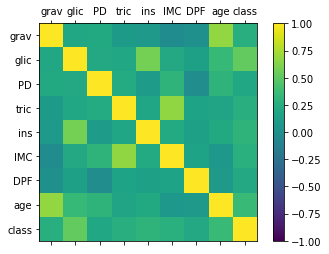

In [14]:
#Correction Matrix Plot
atributos = ['#Gravidezes', 'Glicose', 'PD',
             'DobraTriceps', 'Insulina', 'IMC',
             'DiabetesPdFunction', 'Idade', 'Classe']
df_correlation = pd.read_csv('/kaggle/working/diatebes_processado.csv', names = atributos)
matriz = df_correlation.corr()
#plot da matriz de correlação
graf = plt.figure()
subgraf = graf.add_subplot(111)
cax = subgraf.matshow(matriz, vmin = -1, vmax = 1)
graf.colorbar(cax)
ticks = np.arange(0,9,1)
subgraf.set_xticks(ticks)
subgraf.set_yticks(ticks)
titulos_abreviados = ['grav', 'glic', 'PD', 'tric', 'ins', 'IMC', 'DPF', 'age', 'class']
subgraf.set_xticklabels(titulos_abreviados)
subgraf.set_yticklabels(titulos_abreviados)
plt.show()


array([[<AxesSubplot:xlabel='grav', ylabel='grav'>,
        <AxesSubplot:xlabel='glic', ylabel='grav'>,
        <AxesSubplot:xlabel='PD', ylabel='grav'>,
        <AxesSubplot:xlabel='tric', ylabel='grav'>,
        <AxesSubplot:xlabel='ins', ylabel='grav'>,
        <AxesSubplot:xlabel='IMC', ylabel='grav'>,
        <AxesSubplot:xlabel='DPF', ylabel='grav'>,
        <AxesSubplot:xlabel='age', ylabel='grav'>,
        <AxesSubplot:xlabel='class', ylabel='grav'>],
       [<AxesSubplot:xlabel='grav', ylabel='glic'>,
        <AxesSubplot:xlabel='glic', ylabel='glic'>,
        <AxesSubplot:xlabel='PD', ylabel='glic'>,
        <AxesSubplot:xlabel='tric', ylabel='glic'>,
        <AxesSubplot:xlabel='ins', ylabel='glic'>,
        <AxesSubplot:xlabel='IMC', ylabel='glic'>,
        <AxesSubplot:xlabel='DPF', ylabel='glic'>,
        <AxesSubplot:xlabel='age', ylabel='glic'>,
        <AxesSubplot:xlabel='class', ylabel='glic'>],
       [<AxesSubplot:xlabel='grav', ylabel='PD'>,
        <AxesSubplot:x

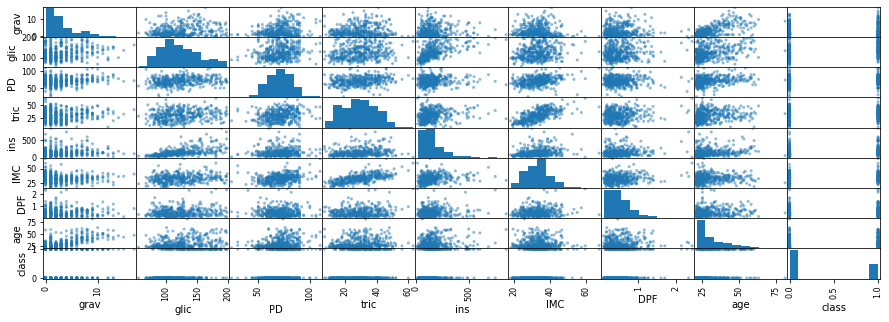

In [15]:
#Matriz de Diagramas de Dispersão
import pandas as pd
from pandas.plotting import scatter_matrix

df_dispersao = pd.read_csv('/kaggle/working/diatebes_processado.csv', names = titulos_abreviados)
scatter_matrix(df_dispersao, figsize = (15, 5))

In [16]:
#Testando atributos glicose e insulina por meio do Coeficiente de Correlação de Pearson
coeficiente = df_correlation.corr()
coeficiente

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPdFunction,Idade,Classe
#Gravidezes,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glicose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
PD,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
DobraTriceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulina,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
IMC,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPdFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Idade,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Classe,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


___
Os valores p de Pearson podem ser interpretados como:
- .> 0.9 ou < -0.9: correlação **muito forte** (positiva ou negativa, dependendo do sinal do p)
- Entre 0.7 e 0.9 ou ente -0.7 e -0.9: correlação **forte**
- Entre 0.5 e 0.7 ou ente -0.5 e -0.7: correlação **moderada**
- Entre 0.3 e 0.5 ou ente -0.3 e -0.5: correlação **fraca**
- De 0 a 0.3 positivo ou negativo: correlação **desprezível**

A tabela acima mostra que não há duas variáveis com forte correlação linear na amostra, embora existam correlações moderadas, como no caso da Idade e #Gravidezes, ou IMC e DobraTriceps; Glicose e Insulina tem coeficiente 0.58 e ficam muito próximas do limite considerado aceitável (0.6), logo, podemos assumir que elas possuem correlação **moderada**

### Conclusões:
- O conjunto de dados tinha muitos valores zerados, que foram removidos para análise exploratória
- Aproximadamente 2/3 das pessoas no conjunto pertence à classe 1 (com diabetes)
- A análise exploratória parece apontar que poucos fatores influenciam na variável dependente, **Classe**
- Há uma correlação **moderada** entre algumas poucas variáveis independentes, o que deve ser levado em conta, pois, se forem incluídas variáveis correlacionadas, poderá haver aumento da variância, o que prejudicaria a acurácia de nosso modelo
___

## Pandas Profillin

In [17]:
#Agora usaremos o Pandas Profiling para realizar a análise do nosso dataset
from pandas_profiling import ProfileReport
df_profiling = pd.read_csv('/kaggle/input/diabetes/diabetes.csv', names = atributos)
html_output = ProfileReport(df_profiling).to_file(output_file = 'relatorio.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
#Verificando a distribuição dos atributos IMC e PD par ver se estão de fato normalmente distribuídos
from scipy.stats import shapiro
df_shapiro = pd.read_csv('/kaggle/working/diatebes_processado.csv', names = atributos)

print('PD')
stat, p = shapiro(df_shapiro["PD"])
print(f'Estatística = {stat:.3f} e p = {p:.3f}')
#Nível de significância ↓
alfa = 0.5
if p > alfa:
    print('Não é possível rejeitar a hipótese nula (PD segue uma Distribuição Normal)')
else:
    print('Hipótese nula rejeitada (PD NÃO segue uma Distribuição Normal)')
print('--'*15)   

print('IMC')
stat, p = shapiro(df_shapiro["IMC"])
print(f'Estatística = {stat:.3f} e p = {p:.3f}')
if p> alfa:
    print('Não é possivel rejeitar a hipótese nula (IMC segue uma Distribuição Normal)')
else:
    print('Hipótese nula rejeitada (IMC NÃO segue uma Distribuição Normal)')
              
      

PD
Estatística = 0.990 e p = 0.009
Hipótese nula rejeitada (PD NÃO segue uma Distribuição Normal)
------------------------------
IMC
Estatística = 0.974 e p = 0.000
Hipótese nula rejeitada (IMC NÃO segue uma Distribuição Normal)


___
### Escalonando os dados
___
Para evitar outliers na amostra, utilizatemos um escalonador, um objeto que colocará os dados em uma mesma escala, **padronizando-os**, o que, em estatística, sgnifica aplicar transformações matemáticas para que os dados tenham, ao final, media 0 e desvio padrão 1, aplicando a fórmula do Z-Score: z = (x-μ)/σ.
Faremos isso utilizando o StandardScaler da biblioteca Scikit-Learn

In [19]:
from sklearn.preprocessing import StandardScaler
df_scaler = pd.read_csv('/kaggle/working/diatebes_processado.csv', names = atributos)

#seleção dos atributos, variáveis independentes
X = df_scaler.drop("Classe", axis = 1)
y = df_scaler["Classe"]

#padronização dos dados
escalonador = StandardScaler()
X = escalonador.fit_transform(X)
df_X = pd.DataFrame(X)

In [20]:
#agora dividiremos a base de dados entre dados de rteste e treino

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size = 0.15)

#Criando e treinando o classificador
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)

#Realizando as previsões sobre os dados de teste
y_prev = algoritmo.predict(X_test)

#Verificando a acurácia do modelo
score = algoritmo.score(X_test, y_test)
print(f'Acurácia do modelo: {score:.2f}')

Acurácia do modelo: 0.80


**A acurácia do moelo pode variar**